<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/16_mmdet/Training%20and%20Inference%20Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/17_retinaface/installation
     
 - Select the right file and run
 
     - cat requirements.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
! cd Monk_Object_Detection/17_retinaface/installation && cat requirements.txt | xargs -n 1 -L 1 pip install

## Dataset Directory Structure

    Dataset
        |-----Images
                |------img1.jpg
                |------img2.jpg
                |------....(and so on)
        |-----labels.csv
        
    Annotation format
    
    |image                | label                                                           |
    |img1.jpg             | x1 y1 x2 y2 label_name x1 y1 x2 y2 label_name ... (and so on )  |



In [15]:
! pip install pandas

  Using cached pandas-1.1.1-cp36-cp36m-manylinux1_x86_64.whl (10.5 MB)
  Using cached pytz-2020.1-py2.py3-none-any.whl (510 kB)


# Download sample dataset
 - Credits: http://shuoyang1213.me/WIDERFACE/

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=17uJR1erq4rWPAt6SSl9wYsoV4v20ONA-' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=17uJR1erq4rWPAt6SSl9wYsoV4v20ONA-" -O dataset.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq dataset.zip

# Training

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/17_retinaface/lib/");

In [2]:
from train_engine import Detector

In [3]:
gtf = Detector();

In [4]:
img_dir = "dataset/images/";
anno_file = "dataset/train_labels.csv";

gtf.Train_Dataset(img_dir, anno_file)

In [5]:
gtf.Dataset_Params(batch_size=32, num_workers=4)

In [6]:
gtf.List_Models();

1. Model - mobilenet
2. Model - resnet


In [7]:
gtf.Model_Params(model_type="mobilenet", use_gpu=True, resume_from=None)

In [8]:
gtf.Hyper_Parameters(lr=0.0001, momentum=0.9, weight_decay=0.0005, gamma=0.1)

In [9]:
gtf.Training_Params(num_epochs=20, output_dir="weights_trained")

In [10]:
gtf.Train();

Loading Dataset...
Done...
{'name': 'mobilenet0.25', 'min_sizes': [[16, 32], [64, 128], [256, 512]], 'steps': [8, 16, 32], 'variance': [0.1, 0.2], 'clip': False, 'loc_weight': 2.0, 'gpu_train': True, 'batch_size': 32, 'ngpu': 1, 'epoch': 20, 'decay1': 190, 'decay2': 220, 'image_size': 640, 'pretrain': True, 'return_layers': {'stage1': 1, 'stage2': 2, 'stage3': 3}, 'in_channel': 32, 'out_channel': 64}
Loading Network...
Done...
Epoch:1/20 || Epochiter: 1/63 || Iter: 1/1260 || Loc: 4.2654 Cla: 10.4479 Landm: 0.0000 || LR: 0.00010000 || Batchtime: 3.5423 s || ETA: 1:14:23
Epoch:1/20 || Epochiter: 51/63 || Iter: 51/1260 || Loc: 4.1540 Cla: 5.9242 Landm: 0.0000 || LR: 0.00010000 || Batchtime: 0.3138 s || ETA: 0:06:19
Epoch:2/20 || Epochiter: 38/63 || Iter: 101/1260 || Loc: 3.8755 Cla: 4.7500 Landm: 0.0000 || LR: 0.00010000 || Batchtime: 0.2890 s || ETA: 0:05:35
Epoch:3/20 || Epochiter: 25/63 || Iter: 151/1260 || Loc: 3.1281 Cla: 4.2760 Landm: 0.0000 || LR: 0.00010000 || Batchtime: 1.2516 s 

# Inference on test images

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/17_retinaface/lib/");

In [2]:
from infer_engine import Infer

In [3]:
gtf = Infer();

In [4]:
gtf.Model_Params(model_type="mobilenet", 
                     model_path="weights_trained/mobilenet0.25_Final.pth", 
                     use_gpu=True)

Loading pretrained model from weights_trained/mobilenet0.25_Final.pth
remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:300
Finished loading model!


### Download test images

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1V4H2AgosFRHD8u8ore1mn3ay4_KdQsit' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1V4H2AgosFRHD8u8ore1mn3ay4_KdQsit" -O test_face.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq test_face.zip

net forward time: 0.2154


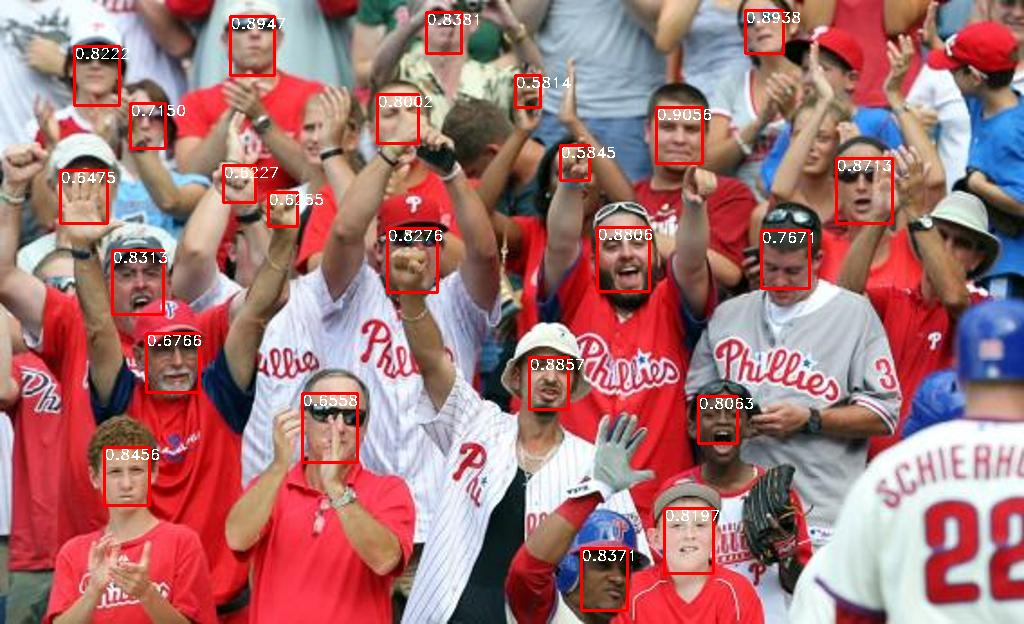

In [5]:
gtf.Predict(img_path="test_face/test1.jpg", thresh=0.5, out_img_path="result.jpg")
from IPython.display import Image
Image(filename='result.jpg', width=640)

net forward time: 0.2350


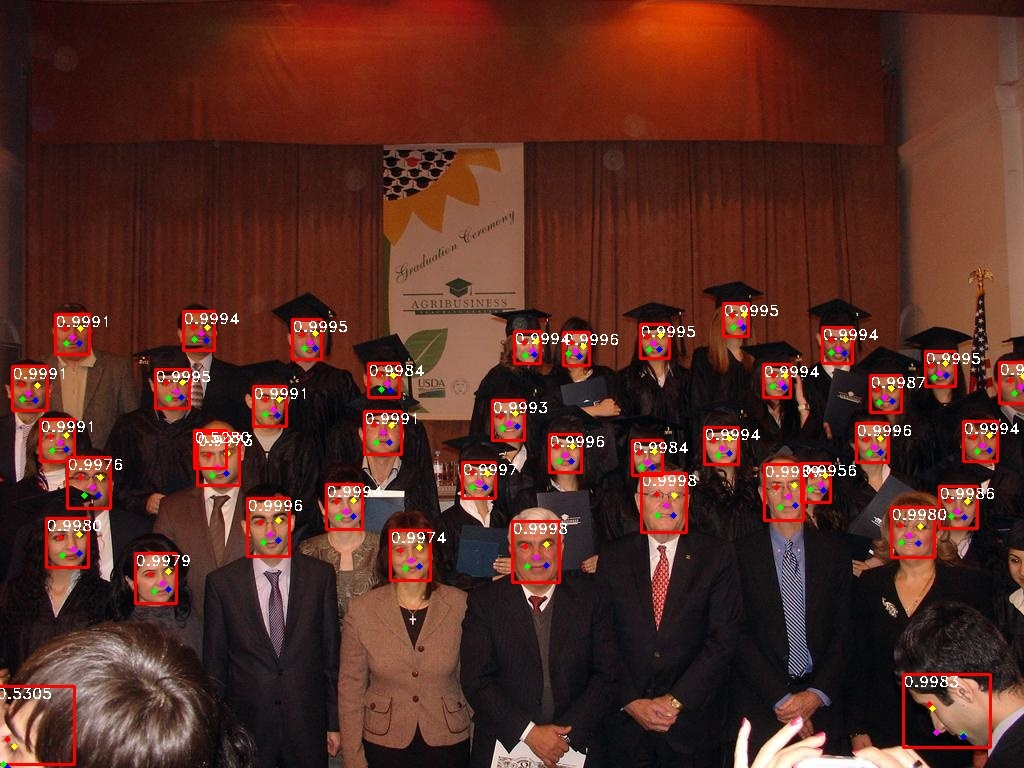

In [6]:
gtf.Predict(img_path="test_face/test2.jpg", thresh=0.5, out_img_path="result.jpg")
from IPython.display import Image
Image(filename='result.jpg', width=640)